<a href="https://colab.research.google.com/github/Angebarrutia/Coderhouse-Curso-Data-Science-II/blob/main/Entregas/Primera%20Entrega/ProyectoEntrega1DSII_BarrutiaAngela.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRIMERA ENTREGA: Análisis del sector de Telecomunicaciones Peruano y su influencia en los leads de la empresa Nubyx**

# Desarrollado por: Angela Barrutia

## *Parte 1: Introducción*

## Abstracto
El propósito de este proyecto, realizado como parte del curso Data Science II, es analizar cómo condiciones reales del ecosistema de Internet en Perú, medido mediante datos públicos de **Cloudflare Radar**, se relacionan con el comportamiento comercial de una base de **leads de Nubyx (2023–2024)**.  

La motivación surge de la necesidad de entender si **la calidad del Internet nacional** (latencia, tráfico, actividad por proveedores) puede influir en:

- El interés de los usuarios por contratar Internet
- La variación en el volumen de leads según el entorno digital
- La conversión o no conversión de los leads

Este proyecto, constituye la continuación del proyecto realizado como parte del curso Data Science I, en donde se aplican técnicas de análisis exploratorio y modelos de machine learning sobre datos comerciales de Nubyx, empresa peruana de telecomunicaciones especializada en internet por fibra óptica; con el objetivo principal es predecir la probabilidad de conversión de un lead en cliente, a partir de datos registrados en canales digitales durante el periodo 2023–2024.

## Audiencia
El análisis está dirigido a:

- Equipos comerciales y marketing
- Equipos de data & analytics
- Gerencia general
- Empresas de telecomunicaciones o ISPs en Perú

La lectura es apta para perfiles técnicos y no técnicos.

##Conceptos a utilizar y definiciones:

1. Lead: Persona interesada en contratar el servicio de Nubyx, prospecto de venta.

2. DNI o RUC: Identificador nacional de identidad, único para cada persona o empresa.

3. Cobertura: Disponibilidad del servicio de internet en una determinada zona geográfica (En cobertura o Fuera de cobertura).

4. Conversión: Proceso mediante el cual un lead se convierte en cliente activo.

5. Estado de Atención: Clasificación del lead según su avance en el proceso de venta.

6. Fuente de Ingreso Web: Canal digital web a través del cual se captó el lead.

7. Servicio: Tipo de servicio ofrecido; se divide en dos: Internet para el Hogar e Internet para la Empresa.

8. Plan: Paquete de internet ofrecido por Nubyx con una velocidad y precio específico.

9. Precio Base: Costo inicial del plan de internet sin descuentos ni promociones.

10. Velocidad del Plan: Capacidad de transmisión de datos en Mbps de un plan de internet.

11. Segmentación Geográfica: División del mercado en regiones, provincias y distritos para análisis.

12. Tasa de Conversión: Indicador que mide el porcentaje de leads que se convierten en clientes.

13. Tipo de Vivienda: Clasificación de las viviendas según su estructura (casa, departamento o condominio).

14. Latitud y Longitud: Coordenadas geográficas que indican la ubicación de un lead registrado.

15. Teléfono: Número de comunicación con el cliente, usualmente de 9 dígitos; puede incluir números de hogar o identificador de país a futuro.

16. Estado de Cobertura: Indica si la zona del lead tiene o no disponibilidad del servicio de internet.

17. Región / Provincia / Distrito: Segmentación geográfica de los leads.

18. Estados del Lead:

* Contrato Cerrado: Lead contrató el servicio y se convirtió en cliente activo.

* En Seguimiento: Lead interesado pero aún no disponible para contratar el servicio.

* No desea el servicio: Lead no interesado en servicio, planes o promociones.

* No responde: Lead no responde la comunicación a pesar de varios intentos.

* Registro en Base de Datos: Lead registrado para ser considerado cuando se abra cobertura en su zona.

* Ya es Cliente: Lead ya era cliente antes de la comunicación pero desea algún servicio de atención, migrar de plan, etc.


# *Parte 2: Carga y limpieza de la Base de Datos *

In [105]:
# Se importan las librerías y se sube el csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mlp
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

# Cargar el CSV directamente desde GitHub
url = "https://raw.githubusercontent.com/Angebarrutia/Coderhouse-Curso-Data-Science-I-/main/Entregas/Entrega%20Final/base_nubyx_leads2023-2024_of.csv"
df = pd.read_csv(url, encoding='latin-1', delimiter=';')

In [106]:
display(df.head(6))

,DATETIME,DNI O RUC,NOMBRE,REGIÓN,PROVINCIA,DISTRITO,TIPO DE VIVIENDA,LONGITUD,LATITUD,SERVICIO,PLAN,VELOCIDAD,PRECIO BASE,FUENTE DE INGRESO WEB,ESTADO DE COBERTURA,ESTADO DE ATENCIÓN
0,1/01/2023 02:04,1000001,Arly Guerra,Ica,Ica,Ica,Casa,-14.064100,-75.729200,Internet Hogar,Dúo,500 Mbps,S/ 139.00,Web Oficial,Fuera de Cobertura,Registro en Base de Datos
1,1/01/2023 09:29,1000002,Jean Osorio,Callao,Callao,Bellavista,Departamento,-12.053219,-77.091982,Internet Hogar,Dúo,200 Mbps,S/ 119.00,Web Oficial,Fuera de Cobertura,Registro en Base de Datos
2,1/01/2023 18:18,1000003,Briyit Felix,Lima,Lima,Barranco,Casa,-12.153598,-77.022358,Internet Hogar,Dúo,100 Mbps,S/ 99.00,Landing Cobertura,Fuera de Cobertura,Registro en Base de Datos
3,1/01/2023 18:33,1000004,Miguel Chumbimuni,Lima,Lima,Magdalena del Mar,Departamento,-12.095704,-77.071990,Internet Hogar,Dúo,200 Mbps,S/ 119.00,Landing Cobertura,Fuera de Cobertura,Registro en Base de Datos
4,1/01/2023 18:41,1000005,Enson Fernandez,Cusco,Cusco,Cusco,Departamento,-13.523865,-71.993524,Internet Hogar,Dúo,200 Mbps,S/ 119.00,Landing Planes,Fuera de Cobertura,Registro en Base de Datos
5,1/01/2023 20:10,1000006,Miguel Flores,Lima,Lima,San Borja,Casa,-12.111055,-77.000180,Internet Hogar,Internet,100 Mbps,S/ 79.00,Landing Planes,Fuera de Cobertura,Registro en Base de Datos


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16567 entries, 0 to 16566
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DATETIME               16567 non-null  object 
 1   DNI O RUC              16567 non-null  int64  
 2   NOMBRE                 16567 non-null  object 
 3   REGIÓN                 16567 non-null  object 
 4   PROVINCIA              16567 non-null  object 
 5   DISTRITO               16567 non-null  object 
 6   TIPO DE VIVIENDA       16567 non-null  object 
 7   LONGITUD               16567 non-null  float64
 8   LATITUD                16567 non-null  float64
 9   SERVICIO               16567 non-null  object 
 10  PLAN                   16567 non-null  object 
 11  VELOCIDAD              16567 non-null  object 
 12  PRECIO BASE            16567 non-null  object 
 13  FUENTE DE INGRESO WEB  16567 non-null  object 
 14  ESTADO DE COBERTURA    16567 non-null  object 
 15  ES

In [108]:
df['DNI O RUC'] = df['DNI O RUC'].astype(str)
# df['TELÉFONO'] = df['TELÉFONO'].astype(str) # Removed the line causing KeyError

In [109]:
df['DATETIME'] = df['DATETIME'].astype('str')

In [110]:
df['LONGITUD'] = df['LONGITUD'].astype('str')

In [111]:
df['LATITUD'] = df['LATITUD'].astype('str')

In [112]:
 # Identificamos los nulos

null_counts = df.isnull().sum()

if null_counts.sum() == 0:
  print("No se identificaron datos nulos")
else:
  print(null_counts)

No se identificaron datos nulos


In [113]:
# Definimos el contenido único de cada columna

df['TIPO DE VIVIENDA'].unique()

array(['Casa', 'Departamento', 'Condominio'], dtype=object)

In [114]:
df['SERVICIO'].unique()

array(['Internet Hogar', 'Internet Empresa'], dtype=object)

In [115]:
df['FUENTE DE INGRESO WEB'].unique()

array(['Web Oficial', 'Landing Cobertura', 'Landing Planes',
       'Landing Promociones'], dtype=object)

In [116]:
df['ESTADO DE COBERTURA'].unique()

array(['Fuera de Cobertura', 'En Cobertura', 'En cobertura'], dtype=object)

In [117]:
df['ESTADO DE ATENCIÓN'].unique()

array(['Registro en Base de Datos', 'Contrato Cerrado', 'No responde',
       'En Seguimiento', 'No desea el servicio', 'Ya es Cliente'],
      dtype=object)

In [118]:
#Se filtra solamente a los leads en cobertura para posterior análisis

df_cobertura= df[df['ESTADO DE COBERTURA'] == 'En Cobertura'].copy()
display(df_cobertura.head(5))

df_cobertura.info()

,DATETIME,DNI O RUC,NOMBRE,REGIÓN,PROVINCIA,DISTRITO,TIPO DE VIVIENDA,LONGITUD,LATITUD,SERVICIO,PLAN,VELOCIDAD,PRECIO BASE,FUENTE DE INGRESO WEB,ESTADO DE COBERTURA,ESTADO DE ATENCIÓN
20,2/01/2023 11:49,1000021,Alexis Guevara,Lima,Lima,Miraflores,Departamento,-12.11895178,-77.03418648,Internet Hogar,Dúo,100 Mbps,S/ 99.00,Web Oficial,En Cobertura,Contrato Cerrado
26,2/01/2023 13:00,1000027,Isaac Torres,Lima,Lima,Chorrillos,Casa,-12.19304284,-77.00847668,Internet Hogar,Dúo,500 Mbps,S/ 139.00,Landing Cobertura,En Cobertura,Contrato Cerrado
27,2/01/2023 13:36,1000028,Susana Medina,Lima,Lima,Ate,Casa,-12.1176064,-76.9982464,Internet Hogar,Dúo,200 Mbps,S/ 119.00,Landing Planes,En Cobertura,Contrato Cerrado
46,2/01/2023 18:27,1000047,William Württele,Lima,Lima,Barranco,Casa,-12.1410739,-77.0218907,Internet Hogar,Dúo,100 Mbps,S/ 99.00,Landing Cobertura,En Cobertura,Contrato Cerrado
63,3/01/2023 10:51,1000064,Gary Lopez,Lima,Lima,Chorrillos,Departamento,-12.17134014,-77.0262602,Internet Hogar,Dúo,200 Mbps,S/ 119.00,Landing Cobertura,En Cobertura,Contrato Cerrado


<class 'pandas.core.frame.DataFrame'>
Index: 4904 entries, 20 to 16566
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   DATETIME               4904 non-null   object
 1   DNI O RUC              4904 non-null   object
 2   NOMBRE                 4904 non-null   object
 3   REGIÓN                 4904 non-null   object
 4   PROVINCIA              4904 non-null   object
 5   DISTRITO               4904 non-null   object
 6   TIPO DE VIVIENDA       4904 non-null   object
 7   LONGITUD               4904 non-null   object
 8   LATITUD                4904 non-null   object
 9   SERVICIO               4904 non-null   object
 10  PLAN                   4904 non-null   object
 11  VELOCIDAD              4904 non-null   object
 12  PRECIO BASE            4904 non-null   object
 13  FUENTE DE INGRESO WEB  4904 non-null   object
 14  ESTADO DE COBERTURA    4904 non-null   object
 15  ESTADO DE ATENCIÓN     4


# *Parte 3: Carga de APIs Cloudflare Radar (Perú) *

In [119]:
from google.colab import userdata

try:
    CLOUDFLARE_API_KEY = userdata.get('CLOUDFLARE_API_KEY')
    if CLOUDFLARE_API_KEY:
        print("La clave CLOUDFLARE_API_KEY se encontró en los secretos de Colab.")
        print("Por favor, ahora ejecuta las celdas para descargar los datos de Cloudflare.")
    else:
        print("La clave CLOUDFLARE_API_KEY se encontró, pero su valor está vacío. Por favor, verifica el valor en los secretos.")
except Exception as e:
    print(f"Error: La clave CLOUDFLARE_API_KEY no se encontró o hubo un problema al acceder a ella. Mensaje: {e}")
    print("Por favor, asegúrate de que la clave CLOUDFLARE_API_KEY esté configurada correctamente en tus secretos de Colab, siguiendo los pasos anteriores.")


La clave CLOUDFLARE_API_KEY se encontró en los secretos de Colab.
Por favor, ahora ejecuta las celdas para descargar los datos de Cloudflare.


In [120]:
import requests
import json
import os

## 🔑 PASO 1: CONFIGURACIÓN DE LA API
os.environ['CLOUDFLARE_API_KEY'] = "SjNr6xP68bigX62Ox2YnFb6mHDtFua10IGXPnjFj"

api_key = os.getenv("CLOUDFLARE_API_KEY")
COUNTRY_CODE = "PE"

if not api_key:
    raise ValueError("ERROR: La clave de API no pudo ser cargada.")

headers = {
    "Authorization": f"Bearer {api_key}"
}

# 🔗 PASO 2: ENDPOINTS ACTUALIZADOS CON Perú (location=PE)
urls = {

    # 1. Top Location Speeds con rango de fecha
    # ➜ Ranking de ubicaciones más rápidas del país
    'top_location_speeds_range': (
        "https://api.cloudflare.com/client/v4/radar/quality/speed/top/locations"
        "?start_date=2023-01-01&end_date=2024-12-31"
    ),

    # 2. Top Location Speeds con rango de fecha
    # ➜ Cloudflare calcula velocidades recientes automáticamente
    'top_location_speeds': (
        "https://api.cloudflare.com/client/v4/radar/quality/speed/top/locations"
        "?start_date=2023-01-01&end_date=2024-12-31"
    ),

    # 3. Speed Summary con rango de fecha
    # ➜ Latencia, jitter, download y upload promedio del país
    'speed_summary': (
        "https://api.cloudflare.com/client/v4/radar/quality/speed/summary"
        "?start_date=2023-01-01&end_date=2024-12-31"
    ),

    # 4. ASNs del país con rango de fecha
    # ➜ Lista completa de ASNs relacionados con Perú
    'asns': (
        "https://api.cloudflare.com/client/v4/radar/entities/asns"
        "?location=PE&start_date=2023-01-01&end_date=2024-12-31"
    )
}

print(f"Iniciando descarga de datos de Cloudflare Radar para: {COUNTRY_CODE}")

## ⬇️ PASO 3: DESCARGA
for key, url in urls.items():
    print(f"\nDownloading {key}... URL: {url}")
    try:
        r = requests.get(url, headers=headers)
        r.raise_for_status()

        data = r.json()
        filename = f'cloudflare_{key}_{COUNTRY_CODE.lower()}.json'

        with open(filename, 'w') as f:
            json.dump(data, f, indent=2)

        print(f"✅ Saved {filename}")

    except requests.exceptions.HTTPError as e:
        print(f"❌ Error HTTP al descargar {key}: {e}")
        if e.response is not None:
            try:
                print("   Detalles del error:", json.dumps(e.response.json(), indent=2))
            except:
                print("   Respuesta:", e.response.text)

    except requests.exceptions.RequestException as e:
        print(f"❌ Error de conexión en {key}: {e}")

print("\n---")
print("Toda la data de Cloudflare ha sido descargada correctamente.")


Iniciando descarga de datos de Cloudflare Radar para: PE

✅ Saved cloudflare_top_location_speeds_range_pe.json

✅ Saved cloudflare_top_location_speeds_pe.json

✅ Saved cloudflare_speed_summary_pe.json

✅ Saved cloudflare_asns_pe.json

---
Toda la data de Cloudflare ha sido descargada correctamente.


In [175]:
# ======================================
# Bloque 5 — Transformación API (Corregido)
# ======================================

import os
import json
import pandas as pd

data_api = {}
files = [
    'cloudflare_top_location_speeds_range_pe.json',
    'cloudflare_top_location_speeds_pe.json',
    'cloudflare_speed_summary_pe.json',
    'cloudflare_asns_pe.json'
]

for file in files:
    if os.path.exists(file):
        with open(file, 'r') as f:
            key = file.replace('cloudflare_', '').replace('_pe.json', '')
            data_api[key] = json.load(f)
    else:
        print(f"Warning: File {file} not found.")

# 1. Top Location Speeds (rango)
df_speed_range = pd.json_normalize(
    data_api["top_location_speeds_range"]["result"]
)

# 2. Top Location Speeds (sin rango)
df_speed_simple = pd.json_normalize(
    data_api["top_location_speeds"]["result"]
)

# 3. Speed Summary
df_summary_raw = pd.json_normalize(data_api["speed_summary"]["result"])

# Renombrar columnas importantes
rename_map = {
    "summary_0.bandwidthDownload": "download_mbps",
    "summary_0.bandwidthUpload": "upload_mbps",
    "summary_0.latencyIdle": "latency_idle_ms",
    "summary_0.latencyLoaded": "latency_loaded_ms",
    "summary_0.jitterIdle": "jitter_idle_ms",
    "summary_0.jitterLoaded": "jitter_loaded_ms",
    "summary_0.packetLoss": "packet_loss"
}

df_summary = df_summary_raw.rename(columns=rename_map)

# Filtramos solo las columnas numéricas relevantes
cols_summary = [
    "download_mbps",
    "upload_mbps",
    "latency_idle_ms",
    "latency_loaded_ms",
    "jitter_idle_ms",
    "jitter_loaded_ms",
    "packet_loss"
]

df_summary_clean = df_summary[cols_summary]

# 4. ASNs Perú - Corrected flattening
df_asn = pd.json_normalize(
    data_api["asns"]["result"]["asns"] # Access the 'asns' list within 'result'
)

df_summary_clean

,download_mbps,upload_mbps,latency_idle_ms,latency_loaded_ms,jitter_idle_ms,jitter_loaded_ms,packet_loss
0,109.085249,59.04857,72.238744,230.871292,18.034868,64.549103,0.897128


Columnas del df_speed_range:
Index(['top_0', 'meta.dateRange', 'meta.confidenceInfo', 'meta.normalization',
       'meta.totalTests', 'meta.lastUpdated', 'meta.units'],
      dtype='object')


,top_0,meta.dateRange,meta.confidenceInfo,meta.normalization,meta.totalTests,meta.lastUpdated,meta.units
0,"[{'clientCountryAlpha2': 'ES', 'clientCountryN...","[{'startTime': '2025-08-27T00:00:00Z', 'endTim...",None,RAW_VALUES,[60412],2025-11-25T04:59:57Z,"[{'name': 'bandwidthDownload', 'value': 'Mbps'..."



DF normalizado desde top_0:


,clientCountryAlpha2,clientCountryName,bandwidthDownload,bandwidthUpload,latencyIdle,latencyLoaded,jitterIdle,jitterLoaded,numTests,rankPower
0,ES,Spain,318.693776,199.626843,19.232075,91.95318,6.818607,31.664116,31593,0.924
1,HU,Hungary,308.465372,81.362013,19.08797,87.433393,6.053569,26.872167,6880,0.749
2,CL,Chile,301.30164,152.622417,21.032393,139.483009,10.003252,44.910306,5377,0.681
3,PT,Portugal,301.152892,125.848237,18.287806,95.330794,6.386347,29.745676,9787,0.813
4,DK,Denmark,297.530502,142.437317,17.560304,108.204963,5.817724,33.625367,6775,0.744



DF final listo para graficar:


,location,download,upload
0,Spain,318.693776,199.626843
1,Hungary,308.465372,81.362013
2,Chile,301.301640,152.622417
3,Portugal,301.152892,125.848237
4,Denmark,297.530502,142.437317


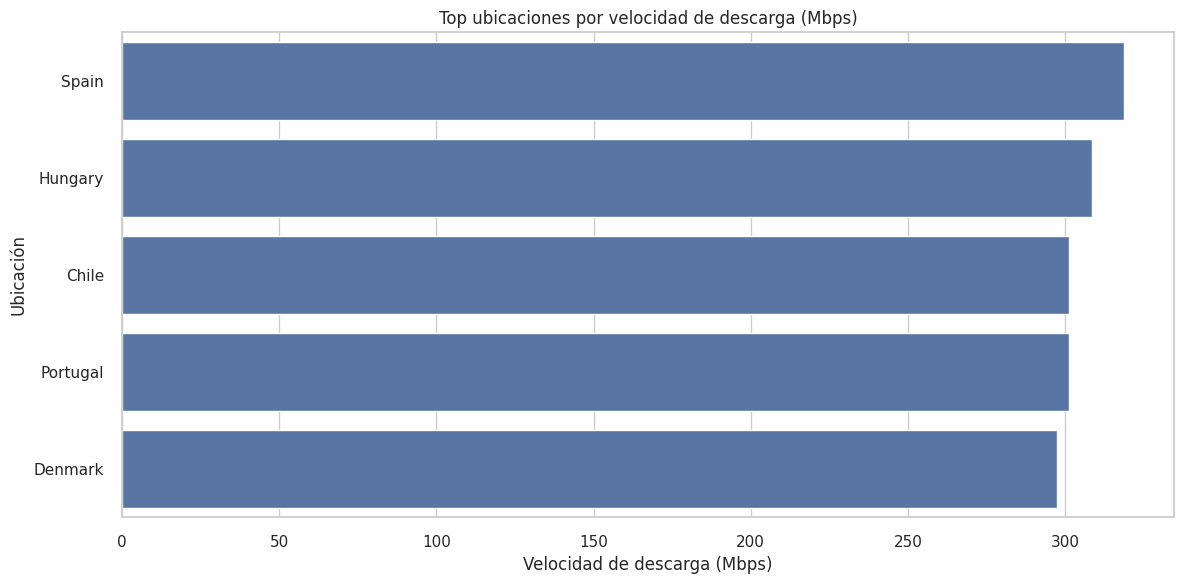

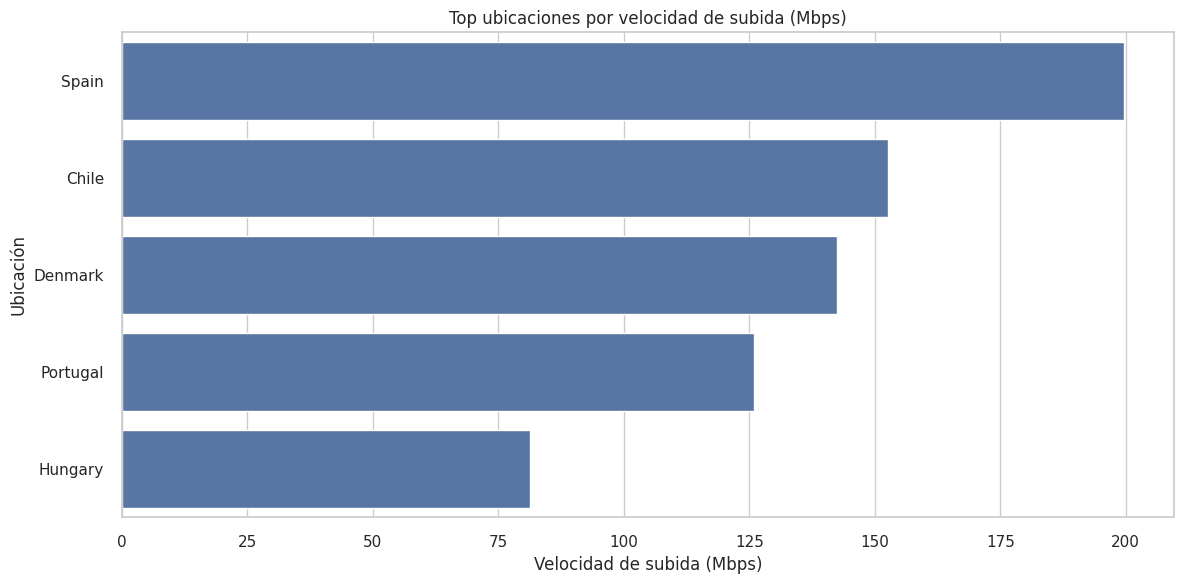

In [122]:
# ===============================================================
#  BLOQUE 6 — Visualización correcta: Velocidades por ubicación
# ===============================================================

print("Columnas del df_speed_range:")
print(df_speed_range.columns)
display(df_speed_range.head())

# ---------------------------------------------------------------
# 1. Extraer la lista correcta desde 'top_0'
# ---------------------------------------------------------------

if "top_0" not in df_speed_range.columns:
    raise ValueError("El endpoint no devolvió una columna llamada 'top_0'.")

lista_top = df_speed_range["top_0"][0]  # lista de ubicaciones

# Convertir lista -> DataFrame
df_locations = pd.json_normalize(lista_top)

print("\nDF normalizado desde top_0:")
display(df_locations.head())

# ---------------------------------------------------------------
# 2. Expandir el campo summary.*  (download / upload) - NOT NEEDED AS DATA IS ALREADY FLAT
# ---------------------------------------------------------------
# The data is already flat, so no 'summary' column to expand.

# Convert bandwidth columns to numeric
df_locations["bandwidthDownload"] = pd.to_numeric(df_locations["bandwidthDownload"])
df_locations["bandwidthUpload"] = pd.to_numeric(df_locations["bandwidthUpload"])

# Renombrar columnas para el plotting
rename_map = {
    "bandwidthDownload": "download",
    "bandwidthUpload": "upload",
    "clientCountryName": "location" # Correctly map the country name to 'location'
}

df_locations = df_locations.rename(columns=rename_map)

# Mantener solo columnas necesarias
cols_needed = [c for c in df_locations.columns if c in ["location", "download", "upload"]]
df_locations = df_locations[cols_needed]

print("\nDF final listo para graficar:")
display(df_locations.head())

# ---------------------------------------------------------------
# 3. Gráficos finales
# ---------------------------------------------------------------
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_locations.sort_values("download", ascending=False),
    x="download",
    y="location"
)
plt.title("Top ubicaciones por velocidad de descarga (Mbps)")
plt.xlabel("Velocidad de descarga (Mbps)")
plt.ylabel("Ubicación")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_locations.sort_values("upload", ascending=False),
    x="upload",
    y="location"
)
plt.title("Top ubicaciones por velocidad de subida (Mbps)")
plt.xlabel("Velocidad de subida (Mbps)")
plt.ylabel("Ubicación")
plt.tight_layout()
plt.show()

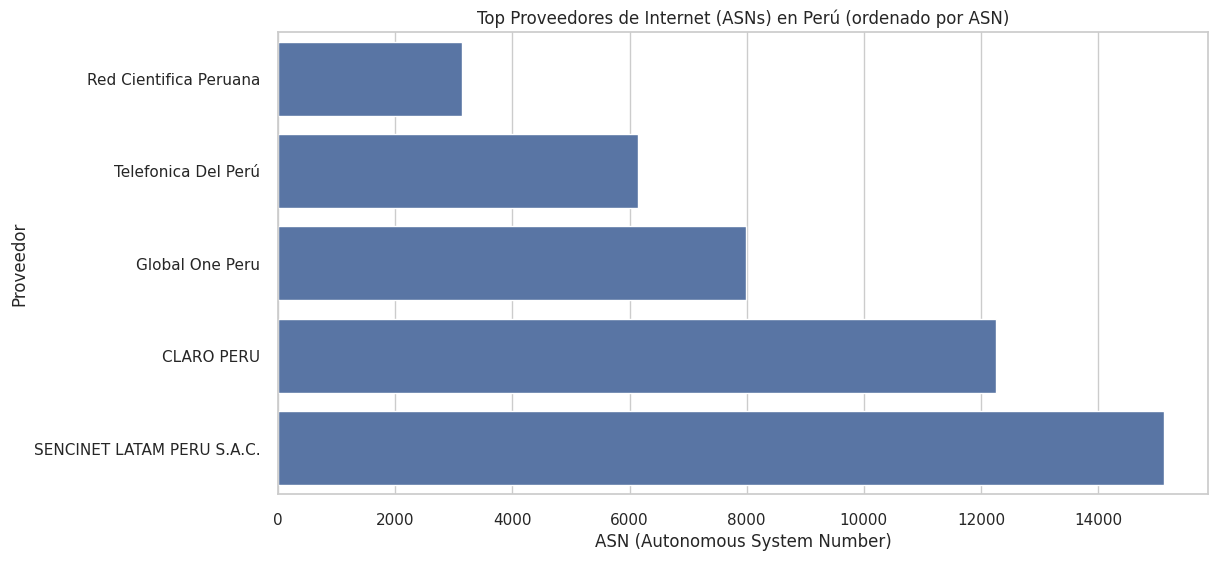

In [123]:
# Sort by 'asn' as 'rank' is not available in this API endpoint
top_asns = df_asn.sort_values(by="asn", ascending=True).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_asns, x="asn", y="name") # Changed x-axis to 'asn'
plt.title("Top Proveedores de Internet (ASNs) en Perú (ordenado por ASN)") # Updated title
plt.xlabel("ASN (Autonomous System Number)") # Updated xlabel
plt.ylabel("Proveedor")
plt.show()

In [124]:
display(df.head(6))

,DATETIME,DNI O RUC,NOMBRE,REGIÓN,PROVINCIA,DISTRITO,TIPO DE VIVIENDA,LONGITUD,LATITUD,SERVICIO,PLAN,VELOCIDAD,PRECIO BASE,FUENTE DE INGRESO WEB,ESTADO DE COBERTURA,ESTADO DE ATENCIÓN
0,1/01/2023 02:04,1000001,Arly Guerra,Ica,Ica,Ica,Casa,-14.0641,-75.7292,Internet Hogar,Dúo,500 Mbps,S/ 139.00,Web Oficial,Fuera de Cobertura,Registro en Base de Datos
1,1/01/2023 09:29,1000002,Jean Osorio,Callao,Callao,Bellavista,Departamento,-12.05321896,-77.09198213,Internet Hogar,Dúo,200 Mbps,S/ 119.00,Web Oficial,Fuera de Cobertura,Registro en Base de Datos
2,1/01/2023 18:18,1000003,Briyit Felix,Lima,Lima,Barranco,Casa,-12.1535978,-77.0223584,Internet Hogar,Dúo,100 Mbps,S/ 99.00,Landing Cobertura,Fuera de Cobertura,Registro en Base de Datos
3,1/01/2023 18:33,1000004,Miguel Chumbimuni,Lima,Lima,Magdalena del Mar,Departamento,-12.0957037,-77.0719904,Internet Hogar,Dúo,200 Mbps,S/ 119.00,Landing Cobertura,Fuera de Cobertura,Registro en Base de Datos
4,1/01/2023 18:41,1000005,Enson Fernandez,Cusco,Cusco,Cusco,Departamento,-13.5238655,-71.9935244,Internet Hogar,Dúo,200 Mbps,S/ 119.00,Landing Planes,Fuera de Cobertura,Registro en Base de Datos
5,1/01/2023 20:10,1000006,Miguel Flores,Lima,Lima,San Borja,Casa,-12.11105544,-77.0001802,Internet Hogar,Internet,100 Mbps,S/ 79.00,Landing Planes,Fuera de Cobertura,Registro en Base de Datos


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16567 entries, 0 to 16566
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   DATETIME               16567 non-null  object
 1   DNI O RUC              16567 non-null  object
 2   NOMBRE                 16567 non-null  object
 3   REGIÓN                 16567 non-null  object
 4   PROVINCIA              16567 non-null  object
 5   DISTRITO               16567 non-null  object
 6   TIPO DE VIVIENDA       16567 non-null  object
 7   LONGITUD               16567 non-null  object
 8   LATITUD                16567 non-null  object
 9   SERVICIO               16567 non-null  object
 10  PLAN                   16567 non-null  object
 11  VELOCIDAD              16567 non-null  object
 12  PRECIO BASE            16567 non-null  object
 13  FUENTE DE INGRESO WEB  16567 non-null  object
 14  ESTADO DE COBERTURA    16567 non-null  object
 15  ESTADO DE ATENCIÓN 

In [126]:
df['DNI O RUC'] = df['DNI O RUC'].astype(str)
# df['TELÉFONO'] = df['TELÉFONO'].astype(str) # Removed the line causing KeyError

In [127]:
df['DATETIME'] = df['DATETIME'].astype('str')

In [128]:
df['LONGITUD'] = df['LONGITUD'].astype('str')

In [129]:
df['LATITUD'] = df['LATITUD'].astype('str')

In [130]:
 # Identificamos los nulos

null_counts = df.isnull().sum()

if null_counts.sum() == 0:
  print("No se identificaron datos nulos")
else:
  print(null_counts)

No se identificaron datos nulos


In [131]:
# Definimos el contenido único de cada columna

df['TIPO DE VIVIENDA'].unique()

array(['Casa', 'Departamento', 'Condominio'], dtype=object)

In [132]:
df['SERVICIO'].unique()

array(['Internet Hogar', 'Internet Empresa'], dtype=object)

In [133]:
df['FUENTE DE INGRESO WEB'].unique()

array(['Web Oficial', 'Landing Cobertura', 'Landing Planes',
       'Landing Promociones'], dtype=object)

In [134]:
df['ESTADO DE COBERTURA'].unique()

array(['Fuera de Cobertura', 'En Cobertura', 'En cobertura'], dtype=object)

In [135]:
df['ESTADO DE ATENCIÓN'].unique()

array(['Registro en Base de Datos', 'Contrato Cerrado', 'No responde',
       'En Seguimiento', 'No desea el servicio', 'Ya es Cliente'],
      dtype=object)

In [136]:
#Se filtra solamente a los leads en cobertura para posterior análisis

df_cobertura= df[df['ESTADO DE COBERTURA'] == 'En Cobertura'].copy()
display(df_cobertura.head(5))

df_cobertura.info()

,DATETIME,DNI O RUC,NOMBRE,REGIÓN,PROVINCIA,DISTRITO,TIPO DE VIVIENDA,LONGITUD,LATITUD,SERVICIO,PLAN,VELOCIDAD,PRECIO BASE,FUENTE DE INGRESO WEB,ESTADO DE COBERTURA,ESTADO DE ATENCIÓN
20,2/01/2023 11:49,1000021,Alexis Guevara,Lima,Lima,Miraflores,Departamento,-12.11895178,-77.03418648,Internet Hogar,Dúo,100 Mbps,S/ 99.00,Web Oficial,En Cobertura,Contrato Cerrado
26,2/01/2023 13:00,1000027,Isaac Torres,Lima,Lima,Chorrillos,Casa,-12.19304284,-77.00847668,Internet Hogar,Dúo,500 Mbps,S/ 139.00,Landing Cobertura,En Cobertura,Contrato Cerrado
27,2/01/2023 13:36,1000028,Susana Medina,Lima,Lima,Ate,Casa,-12.1176064,-76.9982464,Internet Hogar,Dúo,200 Mbps,S/ 119.00,Landing Planes,En Cobertura,Contrato Cerrado
46,2/01/2023 18:27,1000047,William Württele,Lima,Lima,Barranco,Casa,-12.1410739,-77.0218907,Internet Hogar,Dúo,100 Mbps,S/ 99.00,Landing Cobertura,En Cobertura,Contrato Cerrado
63,3/01/2023 10:51,1000064,Gary Lopez,Lima,Lima,Chorrillos,Departamento,-12.17134014,-77.0262602,Internet Hogar,Dúo,200 Mbps,S/ 119.00,Landing Cobertura,En Cobertura,Contrato Cerrado


<class 'pandas.core.frame.DataFrame'>
Index: 4904 entries, 20 to 16566
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   DATETIME               4904 non-null   object
 1   DNI O RUC              4904 non-null   object
 2   NOMBRE                 4904 non-null   object
 3   REGIÓN                 4904 non-null   object
 4   PROVINCIA              4904 non-null   object
 5   DISTRITO               4904 non-null   object
 6   TIPO DE VIVIENDA       4904 non-null   object
 7   LONGITUD               4904 non-null   object
 8   LATITUD                4904 non-null   object
 9   SERVICIO               4904 non-null   object
 10  PLAN                   4904 non-null   object
 11  VELOCIDAD              4904 non-null   object
 12  PRECIO BASE            4904 non-null   object
 13  FUENTE DE INGRESO WEB  4904 non-null   object
 14  ESTADO DE COBERTURA    4904 non-null   object
 15  ESTADO DE ATENCIÓN     4

# *Parte 3: Hipótesis*

## Hipótesis General

Es posible predecir la probabilidad de conversión de un lead en cliente utilizando variables geográficas, demográficas, comerciales y operativas mediante modelos de machine learning.

## 1. ¿Qué regiones tienen la mayor cantidad de leads registrados y cómo varía la probabilidad de conversión por región/provincia/distrito?

Hipótesis: Los leads registrados se concentran principalmente en el distrito de Lima/ provincia de Lima/ región de Lima y este distrito presenta una mayor probabilidad de conversión.

Conclusión: El análisis indica que la mayoría de los leads se concentra en la Región Lima, especialmente en la Provincia Lima, y que estos distritos presentan una mayor cantidad de leads y una gran cantidad de leads convertidos. Sin embargo, al haber mayor volumen de leads hay una tasa de conversión media.  Esto sugiere que la ubicación geográfica puede estimar la probabilidad de que un lead se convierta en cliente.

In [137]:
# Calculamos el total de Leads totales y convertidos por región usando groupby
region_conversion = df_cobertura.groupby('REGIÓN').agg(
    Leads_Totales=('REGIÓN', 'size'),
    Leads_Convertidos=('ESTADO DE ATENCIÓN', lambda x: (x == 'Contrato Cerrado').sum())
).reset_index()

# Calculamos la tasa de conversión por región
region_conversion['Tasa de Conversión(%)'] = (region_conversion['Leads_Convertidos'] / region_conversion['Leads_Totales']) * 100

# Mostramos el resultado ordenado por Leads Totales
display(region_conversion.sort_values(by='Leads_Totales', ascending=False))

,REGIÓN,Leads_Totales,Leads_Convertidos,Tasa de Conversión(%)
5,Lima,4263,4106,96.317148
1,Arequipa,211,210,99.526066
4,Ica,180,170,94.444444
0,Callao,153,153,100.000000
3,Cusco,66,66,100.000000
2,Callao,31,28,90.322581


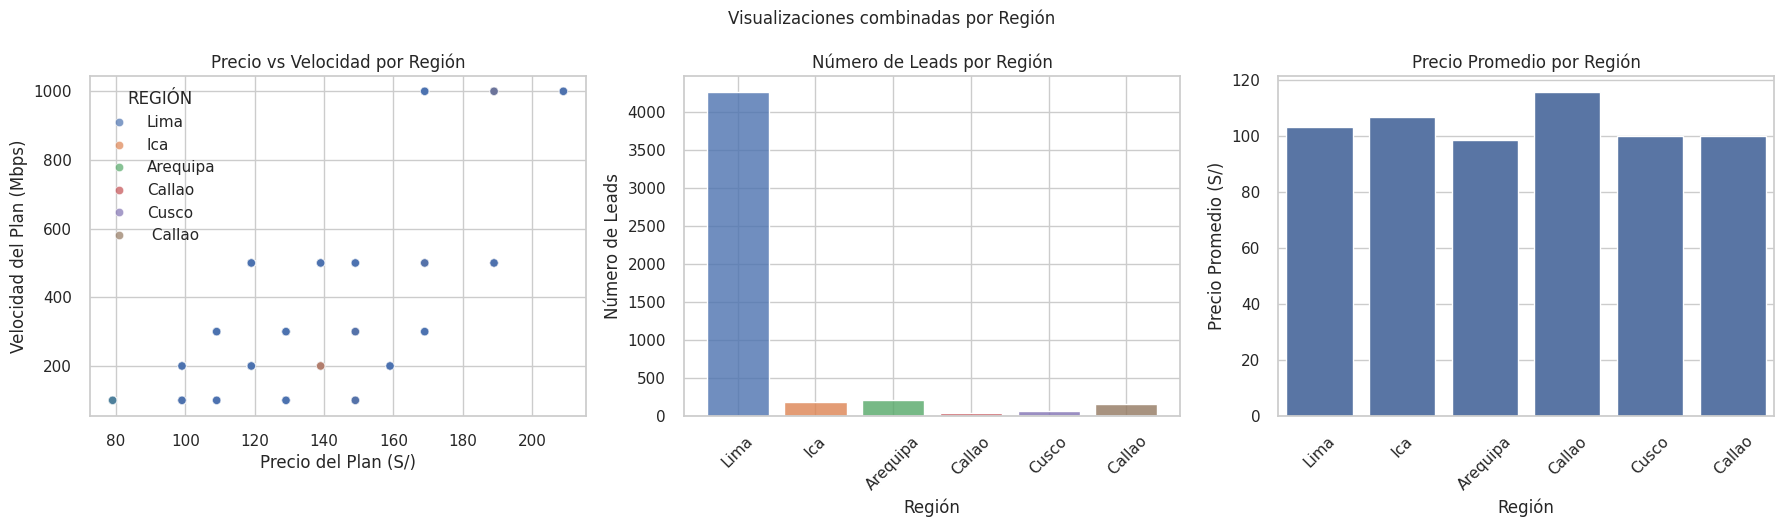

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Use the df_cobertura DataFrame which contains eligible leads
df_plot = df_cobertura.copy()

# Ensure numeric types for price and speed, handling potential errors
df_plot['PRECIO_NUM'] = df_plot['PRECIO BASE'].astype(str).str.replace('S/ ', '', regex=False).astype(float)
df_plot['VELOCIDAD_NUM'] = df_plot['VELOCIDAD'].astype(str).str.replace(' Mbps', '', regex=False).astype(float)

# Create the figure with 3 subplots
f, axs = plt.subplots(1, 3, figsize=(18, 5), gridspec_kw=dict(width_ratios=[5, 5, 5]))

# 1️⃣ Scatterplot: Precio vs Velocidad por Región
sns.scatterplot(data=df_plot, x="PRECIO_NUM", y="VELOCIDAD_NUM", hue="REGIÓN", ax=axs[0], alpha=0.7)
axs[0].set_title("Precio vs Velocidad por Región")
axs[0].set_xlabel("Precio del Plan (S/)")
axs[0].set_ylabel("Velocidad del Plan (Mbps)")

# 2️⃣ Histograma: Número de leads por Región
sns.histplot(data=df_plot, x="REGIÓN", hue="REGIÓN", shrink=0.8, alpha=0.8, legend=False, ax=axs[1])
axs[1].set_title("Número de Leads por Región")
axs[1].set_xlabel("Región")
axs[1].set_ylabel("Número de Leads")
axs[1].tick_params(axis='x', rotation=45)

# 3️⃣ Barplot: Precio promedio por Región
sns.barplot(data=df_plot, x="REGIÓN", y="PRECIO_NUM", ax=axs[2], errorbar=None)
axs[2].set_title("Precio Promedio por Región")
axs[2].set_xlabel("Región")
axs[2].set_ylabel("Precio Promedio (S/)")
axs[2].tick_params(axis='x', rotation=45)

# Ajustes finales
f.tight_layout()
f.suptitle("Visualizaciones combinadas por Región", fontsize=12, y=1.05)
plt.show()

In [139]:
# Filtrar solo las provincias de la REGIÓN Lima
df_lima = df_cobertura[df_cobertura['REGIÓN'] == 'Lima'].copy()

# Calcular Leads Totales por provincia (solo Región Lima)
provincia_lead_counts = df_lima['PROVINCIA'].value_counts().reset_index()
provincia_lead_counts.columns = ['PROVINCIA', 'Leads Totales']

# Calcular Leads Convertidos por provincia (solo Región Lima)
Leads_convertidos = df_lima[df_lima['ESTADO DE ATENCIÓN'] == 'Contrato Cerrado'].copy()
Leads_convertidos_provincia = Leads_convertidos['PROVINCIA'].value_counts().reset_index()
Leads_convertidos_provincia.columns = ['PROVINCIA', 'Leads Convertidos']

# Unir resultados
provincia_conversion = pd.merge(provincia_lead_counts,
                                Leads_convertidos_provincia,
                                on='PROVINCIA',
                                how='left').fillna(0)

# Calcular tasa de conversión
provincia_conversion['Tasa de Conversión (%)'] = (
    provincia_conversion['Leads Convertidos'] / provincia_conversion['Leads Totales']
) * 100

# Mostrar provincias de la Región Lima ordenadas por leads totales
display(provincia_conversion.sort_values(by='Leads Totales', ascending=False))

,PROVINCIA,Leads Totales,Leads Convertidos,Tasa de Conversión (%)
0,Lima,4135,3981,96.275695
1,Cañete,51,50,98.039216
2,Huaral,43,41,95.348837
3,Huaura,30,30,100.000000
4,Huarochirí,1,1,100.000000
5,Canta,1,1,100.000000
6,Barranca,1,1,100.000000
7,Cajatambo,1,1,100.000000


,DISTRITO,Leads Totales,Leads Convertidos,Tasa de Conversión (%)
0,Lima,1442,380,26.352288
1,Miraflores,1165,291,24.978541
2,Santiago de Surco,1083,397,36.657433
3,Ate,879,300,34.129693
4,San Juan de Lurigancho,766,261,34.073107
5,Chorrillos,745,406,54.496644
6,Barranco,463,297,64.146868
7,San Martín de Porres,440,85,19.318182
8,San Borja,332,47,14.156627
9,La Victoria,325,63,19.384615


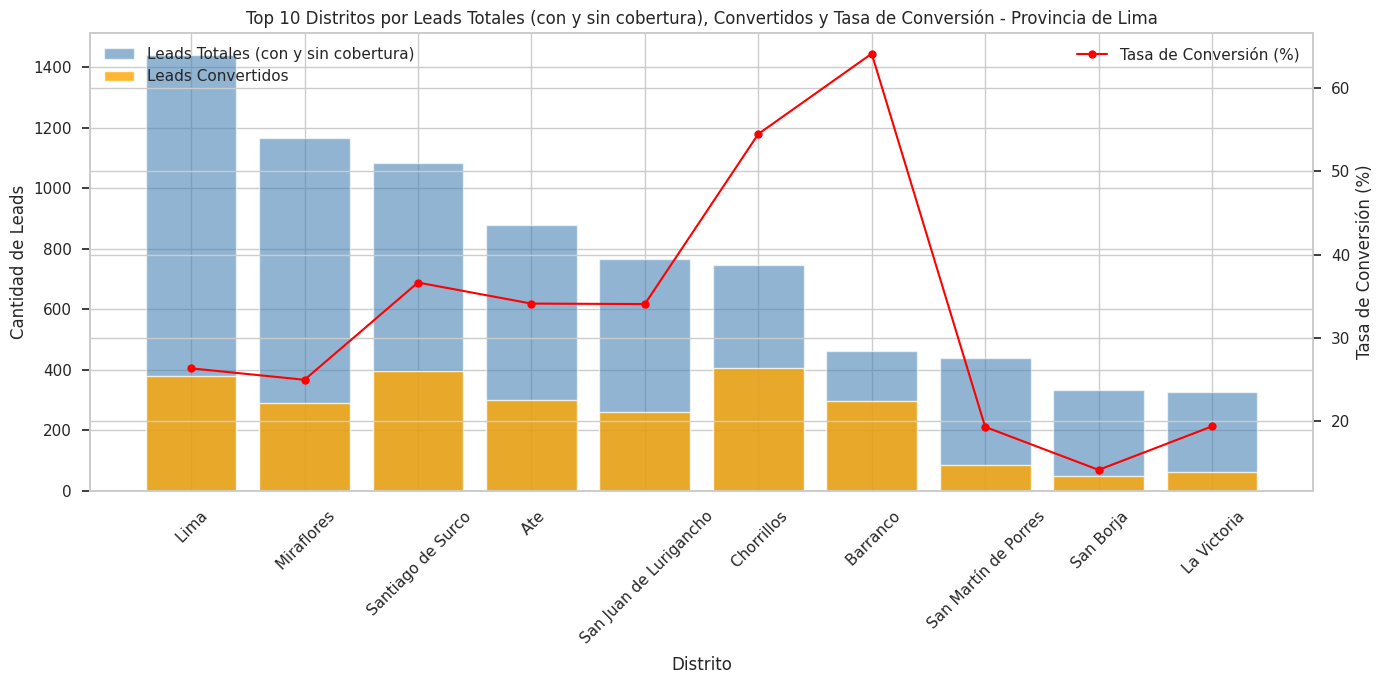

In [140]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Filtrar solo Región Lima y Provincia Lima en el DataFrame original ---
df_lima = df[(df['REGIÓN'] == 'Lima') & (df['PROVINCIA'] == 'Lima')].copy()

# --- Leads Totales por distrito ---
distrito_lead_counts = df_lima['DISTRITO'].value_counts().reset_index()
distrito_lead_counts.columns = ['DISTRITO', 'Leads Totales']

# --- Leads Convertidos (Contrato Cerrado) por distrito ---
distrito_leads_convertidos = df_lima[df_lima['ESTADO DE ATENCIÓN'] == 'Contrato Cerrado']['DISTRITO'].value_counts().reset_index()
distrito_leads_convertidos.columns = ['DISTRITO', 'Leads Convertidos']

# --- Merge de ambos ---
distrito_conversion = pd.merge(distrito_lead_counts, distrito_leads_convertidos,
                               on='DISTRITO', how='left').fillna(0)

# --- Calcular tasa de conversión ---
distrito_conversion['Tasa de Conversión (%)'] = (distrito_conversion['Leads Convertidos'] /
                                                 distrito_conversion['Leads Totales']) * 100

# --- Ordenar por Leads Totales y seleccionar el top 10 ---
distrito_conversion = distrito_conversion.sort_values(by='Leads Totales', ascending=False).head(10)

# Mostrar tabla
display(distrito_conversion)

# --- Visualización Multivariada ---
fig, ax1 = plt.subplots(figsize=(14, 7))

# Barras = Leads Totales y Leads Convertidos
ax1.bar(distrito_conversion['DISTRITO'], distrito_conversion['Leads Totales'],
        label='Leads Totales (con y sin cobertura)', alpha=0.6, color='steelblue')
ax1.bar(distrito_conversion['DISTRITO'], distrito_conversion['Leads Convertidos'],
        label='Leads Convertidos', alpha=0.8, color='orange')
ax1.set_ylabel("Cantidad de Leads")
ax1.set_xlabel("Distrito")
ax1.tick_params(axis='x', rotation=45)
ax1.legend(loc="upper left")

# Línea = Tasa de Conversión
ax2 = ax1.twinx()
ax2.plot(distrito_conversion['DISTRITO'], distrito_conversion['Tasa de Conversión (%)'],
         color='red', marker='o', label='Tasa de Conversión (%)')
ax2.set_ylabel("Tasa de Conversión (%)")
ax2.legend(loc="upper right")

plt.title("Top 10 Distritos por Leads Totales (con y sin cobertura), Convertidos y Tasa de Conversión - Provincia de Lima")
plt.tight_layout()
plt.show()

## 2. ¿Cómo influye la velocidad y el precio del plan en la probabilidad de que un lead muestre interés o contrate el servicio?
Hipótesis: Los leads tienden a mostrar mayor interés por planes con menor velocidad y precio acorde a su tipo de servicio.
Conclusión: El análisis muestra que los leads tienden a interesarse más por planes con precios moderados y velocidades adecuadas a su tipo de servicio, confirmando la hipótesis. Esto indica que precio y velocidad son variables relevantes para predecir la probabilidad de conversión. Incorporar estas características puede mejorar la capacidad predictiva del modelo y ayudar a identificar los planes que generan mayor interés según el tipo de lead (Hogar o Empresas).

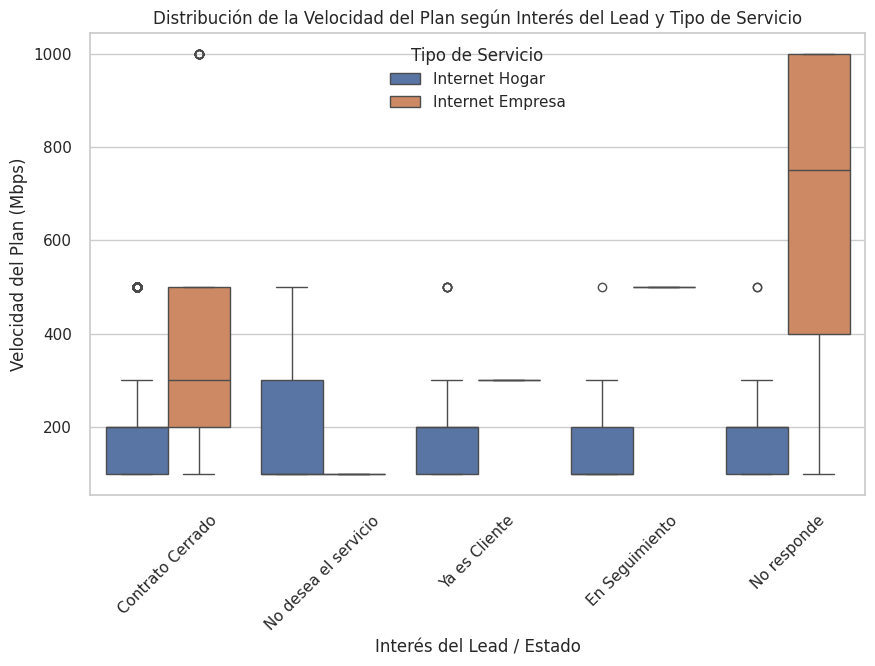

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure numeric types for price and speed, handling potential errors
df_cobertura['PRECIO_NUM'] = df_cobertura['PRECIO BASE'].astype(str).str.replace('S/ ', '', regex=False).astype(float)
df_cobertura['VELOCIDAD_NUM'] = df_cobertura['VELOCIDAD'].astype(str).str.replace(' Mbps', '', regex=False).astype(float)

# Boxplot Velocidad vs Interés del Lead
plt.figure(figsize=(10,6))
sns.boxplot(x="ESTADO DE ATENCIÓN", y="VELOCIDAD_NUM", hue="SERVICIO", data=df_cobertura)
plt.xlabel("Interés del Lead / Estado")
plt.ylabel("Velocidad del Plan (Mbps)")
plt.title("Distribución de la Velocidad del Plan según Interés del Lead y Tipo de Servicio")
plt.xticks(rotation=45)
plt.legend(title="Tipo de Servicio")
plt.show()

In [142]:
import pandas as pd
import plotly.express as px

# Ensure numeric types for price and speed, handling potential errors
df_cobertura['PRECIO_NUM'] = df_cobertura['PRECIO BASE'].astype(str).str.replace('S/ ', '', regex=False).astype(float)
df_cobertura['VELOCIDAD_NUM'] = df_cobertura['VELOCIDAD'].astype(str).str.replace(' Mbps', '', regex=False).astype(float)

# Calculate total leads and converted leads for each unique combination of Service, Plan, Speed, and Base Price
plan_conversion = df_cobertura.groupby(['SERVICIO', 'PLAN', 'VELOCIDAD', 'PRECIO BASE']).agg(
    Total_Leads=('SERVICIO', 'size'),
    Converted_Leads=('ESTADO DE ATENCIÓN', lambda x: (x == 'Contrato Cerrado').sum())
).reset_index()

# Calculate Conversion Rate for each plan
plan_conversion['Conversion_Rate (%)'] = (plan_conversion['Converted_Leads'] / plan_conversion['Total_Leads']) * 100

# Ensure numeric types for the calculated columns for plotting
plan_conversion['PRECIO_NUM'] = plan_conversion['PRECIO BASE'].astype(str).str.replace('S/ ', '', regex=False).astype(float)
plan_conversion['VELOCIDAD_NUM'] = plan_conversion['VELOCIDAD'].astype(str).str.replace(' Mbps', '', regex=False).astype(float)

# Create the scatter plot using Plotly Express
fig = px.scatter(
    plan_conversion,
    x='PRECIO_NUM',
    y='VELOCIDAD_NUM',
    size='Total_Leads',         # Size of bubbles based on total leads
    color='Conversion_Rate (%)', # Color based on Conversion Rate
    hover_name='PLAN',          # Show plan name on hover
    hover_data=['SERVICIO', 'VELOCIDAD', 'PRECIO BASE', 'Total_Leads', 'Converted_Leads', 'Conversion_Rate (%)'], # Additional info on hover
    size_max=60,                # Adjust size of markers (reduced from 100 to 60)
    title='Influencia del Precio y Velocidad del Plan en la Cantidad de Leads y Tasa de Conversión'
)

fig.update_layout(
    xaxis_title='Precio Base (S/)',
    yaxis_title='Velocidad del Plan (Mbps)'
)

fig.show()

##3. ¿Cómo se relaciona la cantidad de leads registrados en un distrito con la velocidad de los planes que suelen contratar?
Hipótesis: En los distritos con mayor cantidad de leads registrados, los leads tienen más probabilidad de contratar planes de menor velocidad.

Conclusión:
El análisis revela que en los distritos con mayor cantidad de leads registrados, los planes contratados tienden a ser de menor velocidad. Esto sugiere que la variable “cantidad de leads por distrito” puede ser un predictor relevante al estimar la velocidad del plan que un lead probablemente seleccionará. Además, incorporar esta información geográfica permite identificar patrones de demanda y ajustar la segmentación de ofertas de manera más precisa.

In [143]:
import pandas as pd
import plotly.express as px

df_cobertura['PRECIO_NUM'] = df_cobertura['PRECIO BASE'].str.replace('S/ ', '', regex=False).astype(float)


df_cobertura['VELOCIDAD_NUM'] = df_cobertura['VELOCIDAD'].str.replace(' Mbps', '', regex=False).astype(float)


df_cobertura['CONVERSION'] = (df_cobertura['ESTADO DE ATENCIÓN'] == 'Contrato Cerrado').astype(int)


lima = df_cobertura[
    (df_cobertura["REGIÓN"] == "Lima") &
    (df_cobertura["PROVINCIA"] == "Lima")
].copy()


if len(lima) > 0:
    # Agrupamos por DISTRITO y PLAN
    grp = lima.groupby(["DISTRITO", "PLAN"], dropna=False).agg(
        precio_prom=("PRECIO_NUM", "mean"),
        vel_prom=("VELOCIDAD_NUM", "mean"),
        leads=("CONVERSION", "size"),
        converted_leads=("CONVERSION", "sum")
    ).reset_index()


    plan_leads = grp.groupby('PLAN')['leads'].sum().reset_index()
    plan_leads = plan_leads.sort_values(by='leads', ascending=False)


    top_10_plans = plan_leads.head(10)['PLAN'].tolist()

    grp_top_10 = grp[grp['PLAN'].isin(top_10_plans)].copy()


    fig = px.scatter(
        grp_top_10,
        x="precio_prom",
        y="vel_prom",
        size="leads",
        color="DISTRITO",
        hover_name="PLAN",
        size_max=60,
        title="Precio vs Velocidad por Distrito-Plan en Lima (tamaño = # leads)"
    )

    fig.update_layout(
        xaxis_title="Precio promedio (S/)",
        yaxis_title="Velocidad promedio (Mbps)"
    )

    fig.show()
else:
    print("No hay registros para Provincia Lima - Región Lima")

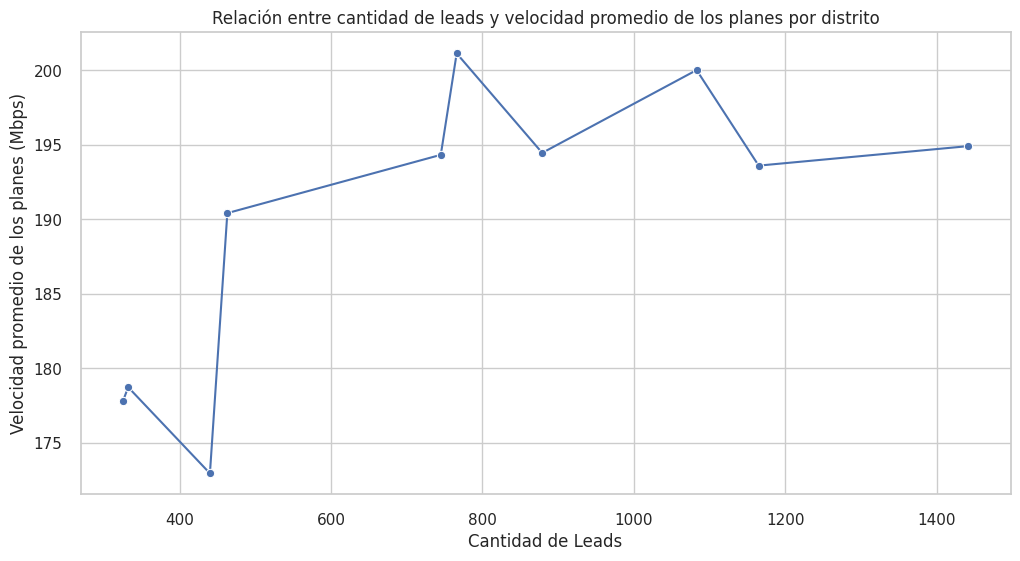

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_cobertura['VELOCIDAD_NUM'] = df_cobertura['VELOCIDAD'].astype(str).str.replace(' Mbps', '', regex=False).astype(float)


district_avg_speed = df_cobertura.groupby('DISTRITO')['VELOCIDAD_NUM'].mean().reset_index()
district_avg_speed.columns = ['DISTRITO', 'Velocidad_Prom']

distrito_conversion = pd.merge(distrito_conversion, district_avg_speed, on='DISTRITO', how='left')

plt.figure(figsize=(12,6))
sns.lineplot(
    data=distrito_conversion.sort_values('Leads Totales'),
    x='Leads Totales',
    y='Velocidad_Prom',
    marker='o'
)

plt.title("Relación entre cantidad de leads y velocidad promedio de los planes por distrito")
plt.xlabel("Cantidad de Leads")
plt.ylabel("Velocidad promedio de los planes (Mbps)")
plt.grid(True)
plt.show()

##4. ¿Cómo influye el tipo de servicio del lead (Hogar o Empresa) en la probabilidad de que contrate un plan de internet de alta velocidad?
Hipótesis: El tipo de servicio solicitado por el lead (Hogar o Empresa) influye en la elección de la velocidad del plan: los leads de internet empresarial tienen mayor probabilidad de elegir planes de alta velocidad, mientras que los leads de internet hogar tienden a elegir planes de menor velocidad.

Conclusión: El análisis muestra que el tipo de servicio del lead influye claramente en la elección de la velocidad del plan. Los leads de internet empresarial presentan una mayor probabilidad de seleccionar planes de alta velocidad, mientras que los leads de internet hogar tienden a optar por planes de menor velocidad. Incorporar esta información permitirá mejorar la precisión de las predicciones y optimizar la segmentación de ofertas según el tipo de cliente.

In [145]:
df_lima = df[df['REGIÓN'] == 'Lima'].copy()

unique_geo_combinations = df_lima[['REGIÓN', 'PROVINCIA', 'DISTRITO']].drop_duplicates()
display(unique_geo_combinations)

,REGIÓN,PROVINCIA,DISTRITO
2,Lima,Lima,Barranco
3,Lima,Lima,Magdalena del Mar
5,Lima,Lima,San Borja
7,Lima,Lima,Chorrillos
8,Lima,Lima,Carabayllo
...,...,...,...
10932,Lima,Barranca,Pativilca
11318,Lima,Huaura,Vegueta
13830,Lima,Lima,Alto de la Alianza
14189,Lima,Huarochirí,Santo Domingo de Los Olleros


In [146]:
import pandas as pd
import plotly.express as px

df_cobertura['PRECIO_NUM'] = df_cobertura['PRECIO BASE'].astype(str).str.replace('S/ ', '', regex=False).astype(float)
df_cobertura['VELOCIDAD_NUM'] = df_cobertura['VELOCIDAD'].astype(str).str.replace(' Mbps', '', regex=False).astype(float)

plan_conversion = df_cobertura.groupby(['SERVICIO', 'PLAN', 'VELOCIDAD', 'PRECIO BASE']).agg(
    Total_Leads=('SERVICIO', 'size'),
    Converted_Leads=('ESTADO DE ATENCIÓN', lambda x: (x == 'Contrato Cerrado').sum())
).reset_index()

plan_conversion['Conversion_Rate (%)'] = (plan_conversion['Converted_Leads'] / plan_conversion['Total_Leads']) * 100

plan_conversion['PRECIO_NUM'] = plan_conversion['PRECIO BASE'].astype(str).str.replace('S/ ', '', regex=False).astype(float)
plan_conversion['VELOCIDAD_NUM'] = plan_conversion['VELOCIDAD'].astype(str).str.replace(' Mbps', '', regex=False).astype(float)

fig = px.scatter(
    plan_conversion,
    x='PRECIO_NUM',
    y='VELOCIDAD_NUM',
    size='Total_Leads',
    color='SERVICIO',
    hover_name='PLAN',
    hover_data=['VELOCIDAD', 'PRECIO BASE', 'Total_Leads', 'Converted_Leads', 'Conversion_Rate (%)'],
    size_max=100,
    title='Influencia del Precio y Velocidad del Plan en la Cantidad de Leads por Tipo de Servicio'
)

fig.update_layout(
    xaxis_title='Precio Base (S/)',
    yaxis_title='Velocidad del Plan (Mbps)'
)

fig.show()

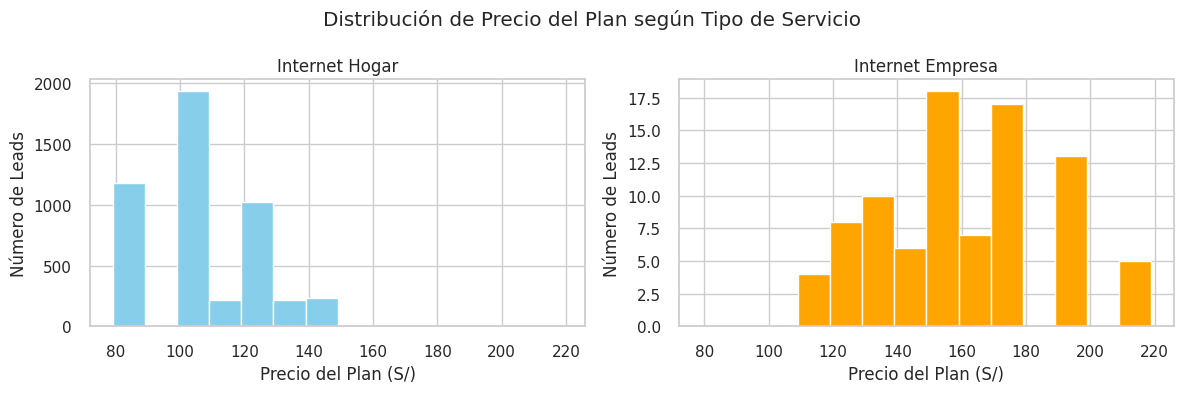

In [147]:
import matplotlib.pyplot as plt

# Filter data for each service type from df_cobertura
hogar_precio = df_cobertura[df_cobertura["SERVICIO"]=="Internet Hogar"]["PRECIO_NUM"].dropna()
empresas_precio = df_cobertura[df_cobertura["SERVICIO"]=="Internet Empresa"]["PRECIO_NUM"].dropna()

# Define a common bin range based on the overall price range in df_cobertura
if not df_cobertura['PRECIO_NUM'].empty:
    min_price = int(df_cobertura['PRECIO_NUM'].min())
    max_price = int(df_cobertura['PRECIO_NUM'].max())
    bin_range = range(min_price, max_price + 20, 10) # Added +20 to ensure max is included in a bin boundary

    # Crear histogramas separados para tipo de servicio (Hogar vs Empresas)
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    # Hogar
    axs[0].hist(hogar_precio,
                color="skyblue", bins=bin_range)
    axs[0].set_title("Internet Hogar")
    axs[0].set_xlabel("Precio del Plan (S/)")
    axs[0].set_ylabel("Número de Leads")

    # Empresas
    axs[1].hist(empresas_precio,
                color="orange", bins=bin_range)
    axs[1].set_title("Internet Empresa")
    axs[1].set_xlabel("Precio del Plan (S/)")
    axs[1].set_ylabel("Número de Leads")

    fig.suptitle("Distribución de Precio del Plan según Tipo de Servicio")
    plt.tight_layout()
    plt.show()
else:
    print("El DataFrame df_cobertura o la columna PRECIO_NUM están vacíos.")

# *Parte 4: Exploración Inicial de Datos y Definición de Variables*

Para este proyecto, se eligió la variable ESTADO DE ATENCIÓN como la variable objetivo porque representa el resultado final del proceso comercial de cada lead: si la gestión culminó en un contrato cerrado (es decir, una conversión exitosa) o no. Esta columna permite identificar de manera directa los casos positivos (clientes adquiridos) y diferenciarlos de los casos negativos (leads que no avanzaron en el proceso o fueron descartados). A partir de esta variable se construyó la variable binaria OBJETIVO_CONTRATO, donde se asigna el valor 1 a los casos con "Contrato Cerrado" y 0 a todos los demás, lo cual es esencial para entrenar modelos de clasificación supervisada y poder estimar la probabilidad de conversión futura a partir de otras características del lead.

In [148]:
# Crear variable binaria objetivo: 1 si es Contrato Cerrado, 0 en otro caso
df['OBJETIVO_CONTRATO'] = df['ESTADO DE ATENCIÓN'].apply(lambda x: 1 if x == 'Contrato Cerrado' else 0)
df['OBJETIVO_CONTRATO'].value_counts()

,count
OBJETIVO_CONTRATO,
0,11834
1,4733


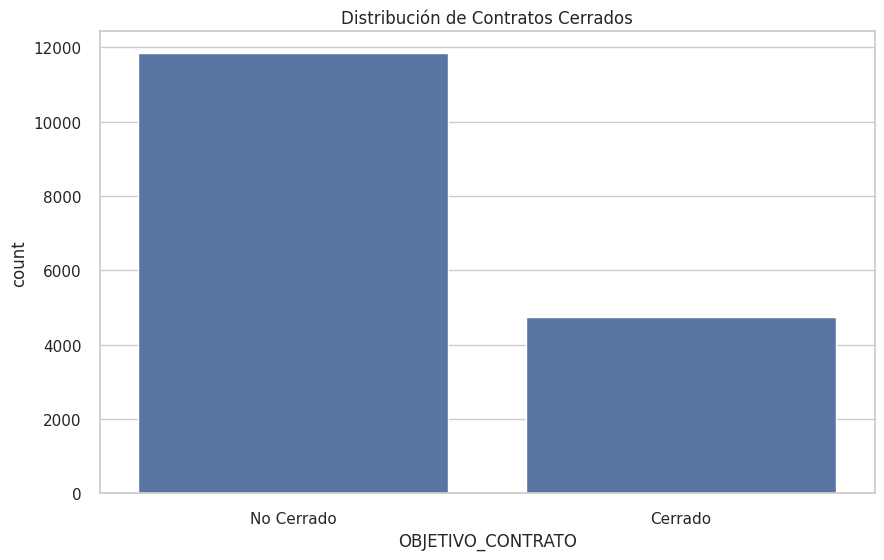

In [149]:
# Distribución de la variable binaria objetivo: Contrato Cerrado
sns.countplot(x='OBJETIVO_CONTRATO', data=df)
plt.title('Distribución de Contratos Cerrados')
plt.xticks([0, 1], ['No Cerrado', 'Cerrado'])
plt.show()

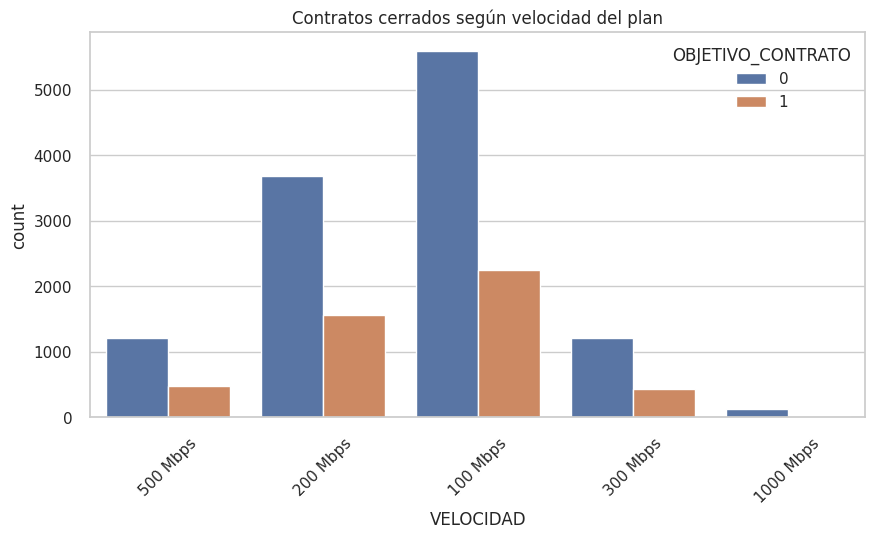

In [150]:
# Contratos Cerrados (Variable binaria objetivo) por velocidad
plt.figure(figsize=(10,5))
sns.countplot(x='VELOCIDAD', hue='OBJETIVO_CONTRATO', data=df)
plt.title('Contratos cerrados según velocidad del plan')
plt.xticks(rotation=45)
plt.show()

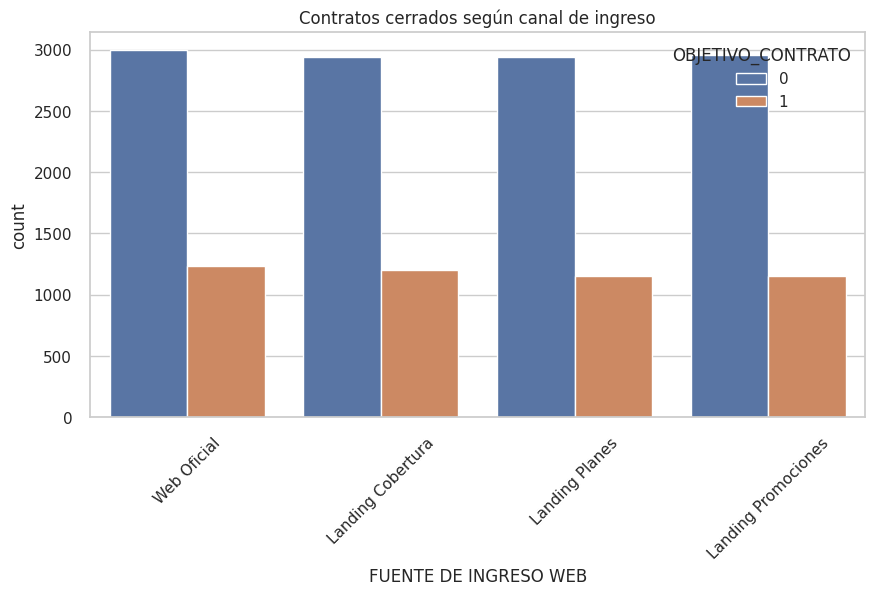

In [151]:
# Contratos Cerrados (Variable binaria objetivo) por fuente de ingreso
plt.figure(figsize=(10,5))
sns.countplot(x='FUENTE DE INGRESO WEB', hue='OBJETIVO_CONTRATO', data=df)
plt.title('Contratos cerrados según canal de ingreso')
plt.xticks(rotation=45)
plt.show()

# *Parte 5: Modelo de Clasificación: Random Forest*

En este proyecto se busca predecir si un lead comercial logrará cerrar contrato, utilizando la variable binaria OBJETIVO_CONTRATO como objetivo. Esta variable toma el valor 1 cuando el estado de atención es "Contrato Cerrado", y 0 en cualquier otro caso. Para abordar esta tarea de clasificación supervisada, se seleccionó el modelo Random Forest, debido a su robustez y buen desempeño con datos mixtos (categóricos y numéricos), como los presentes en la base de leads de Nubyx. Entre las variables predictoras consideradas se encuentran características como región, provincia, distrito, tipo de vivienda, velocidad contratada, fuente de ingreso web y el precio base del plan. Random Forest es capaz de capturar relaciones no lineales y complejas entre estas variables, y además ofrece interpretabilidad a través del análisis de la importancia de cada predictor, lo que resulta útil para comprender qué factores influyen más en la conversión de leads.

In [152]:
from sklearn.preprocessing import LabelEncoder

df_model = df.copy()
cols_cat = ['REGIÓN', 'PROVINCIA', 'DISTRITO', 'TIPO DE VIVIENDA', 'VELOCIDAD', 'FUENTE DE INGRESO WEB']
for col in cols_cat:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])

# Convert 'PRECIO BASE' to numeric
df_model['PRECIO BASE'] = df_model['PRECIO BASE'].astype(str).str.replace('S/ ', '', regex=False).astype(float)

X = df_model[cols_cat + ['PRECIO BASE']]
y = df_model['OBJETIVO_CONTRATO']

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81      3561
           1       0.48      0.32      0.38      1410

    accuracy                           0.71      4971
   macro avg       0.62      0.59      0.60      4971
weighted avg       0.68      0.71      0.69      4971



In [154]:
print('\nDimensiones de los conjuntos de entrenamiento y prueba:')
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)


Dimensiones de los conjuntos de entrenamiento y prueba:
X_train: (11596, 7)
X_test: (4971, 7)
y_train: (11596,)
y_test: (4971,)


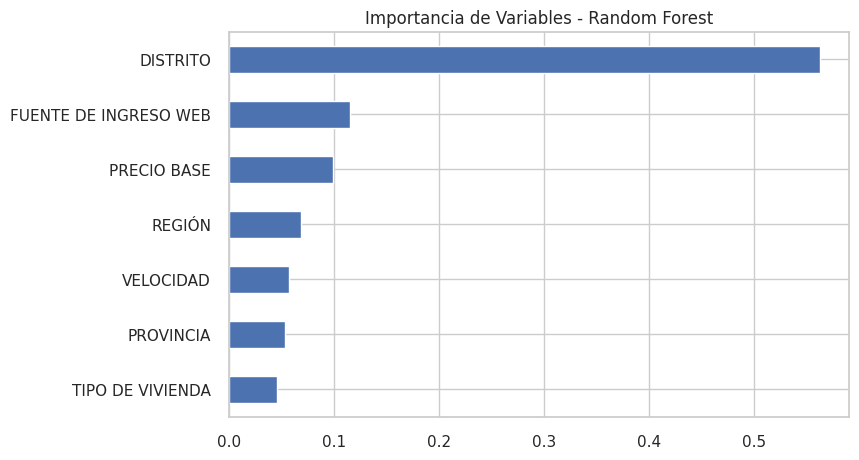

In [155]:
# Importancia de variables
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
importances.plot(kind='barh', title='Importancia de Variables - Random Forest', figsize=(8,5))
plt.gca().invert_yaxis()
plt.show()

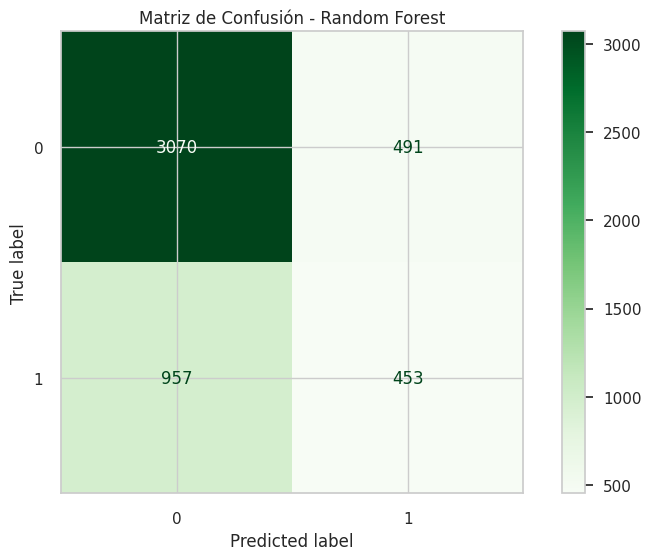

In [156]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap='Greens')
plt.title('Matriz de Confusión - Random Forest')
plt.show()

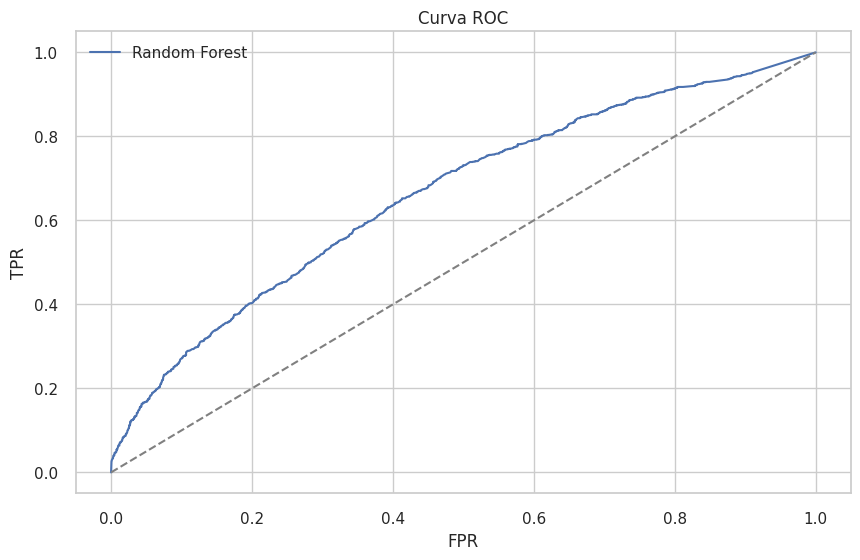

In [157]:
fpr, tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='Random Forest')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC')
plt.legend()
plt.show()

In [158]:
# Crear un DataFrame con predicciones
df_preds = pd.DataFrame({
    'Real': y_test,
    'Predicción': rf.predict(X_test)
})

# Mostrar las primeras filas
df_preds.head(10)

,Real,Predicción
5653,0,0
15620,1,0
6332,1,1
4230,0,0
1688,0,0
6076,0,0
15538,1,1
7047,0,0
4010,0,0
14500,1,0


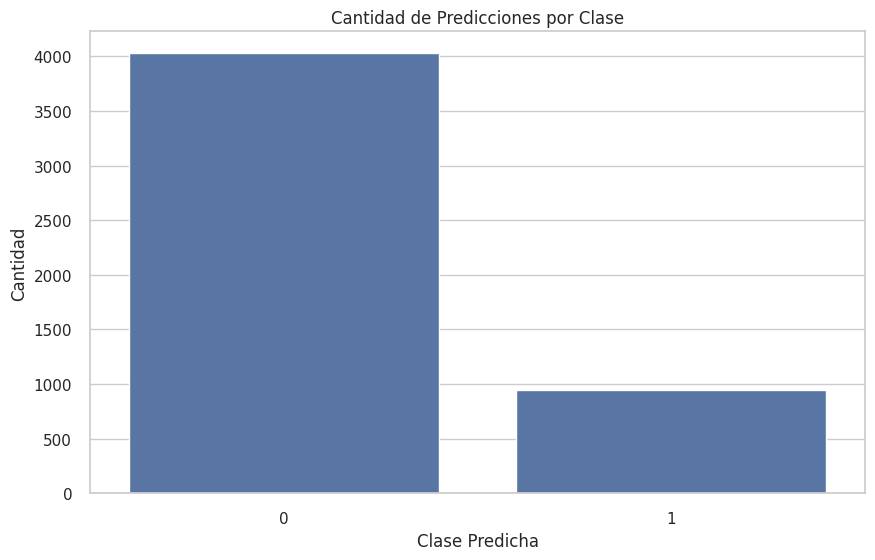

In [159]:
sns.countplot(x=rf.predict(X_test))
plt.title('Cantidad de Predicciones por Clase')
plt.xlabel('Clase Predicha')
plt.ylabel('Cantidad')
plt.show()

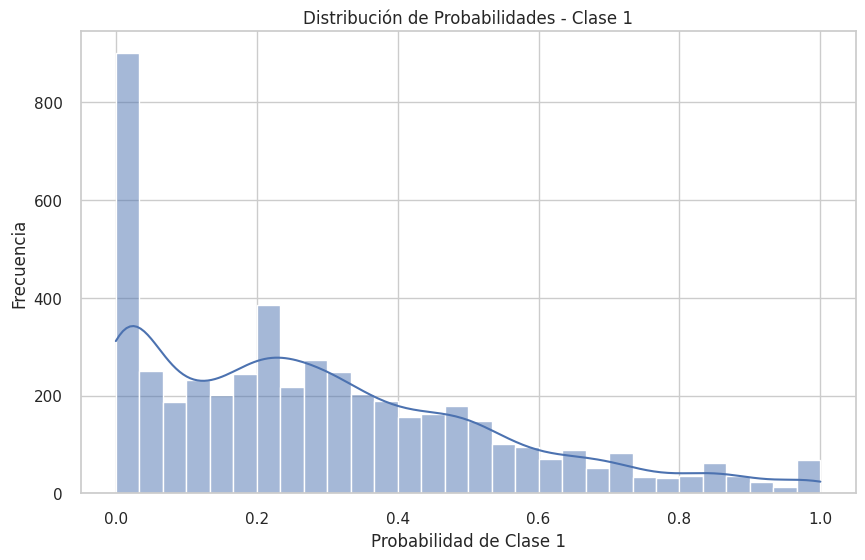

In [160]:
y_probs = rf.predict_proba(X_test)[:, 1]

sns.histplot(y_probs, bins=30, kde=True)
plt.title('Distribución de Probabilidades - Clase 1')
plt.xlabel('Probabilidad de Clase 1')
plt.ylabel('Frecuencia')
plt.show()

In [161]:
df_preds_errors = df_preds[df_preds['Real'] != df_preds['Predicción']]
df_preds_errors.head(10)

,Real,Predicción
15620,1,0
14500,1,0
11847,1,0
7110,0,1
3608,0,1
11423,1,0
13815,1,0
3944,0,1
14731,1,0
9315,1,0


# *Parte 6: Modelo de Clasificación: Regresión Logística*

Además del modelo de Random Forest, se implementó una Regresión Logística como modelo complementario para comparar resultados y evaluar su desempeño en la predicción de la variable objetivo OBJETIVO_CONTRATO, que indica si un lead concretó o no una conversión comercial. La Regresión Logística es un modelo lineal ampliamente utilizado para tareas de clasificación binaria, y permite estimar la probabilidad de ocurrencia de un evento en función de múltiples variables independientes. En este caso, se entrenó utilizando las mismas variables predictoras: ubicación geográfica (región, provincia, distrito), tipo de vivienda, velocidad del plan, fuente de ingreso y precio base. Este modelo permite observar con claridad cómo cada variable influye individualmente en la probabilidad de conversión, lo que resulta útil para generar interpretaciones más directas desde una perspectiva comercial.

In [162]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.75      0.50      0.60      3561
           1       0.31      0.58      0.41      1410

    accuracy                           0.52      4971
   macro avg       0.53      0.54      0.50      4971
weighted avg       0.63      0.52      0.54      4971



In [163]:
print('\nDimensiones de los conjuntos de entrenamiento y prueba:')
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)


Dimensiones de los conjuntos de entrenamiento y prueba:
X_train: (11596, 7)
X_test: (4971, 7)
y_train: (11596,)
y_test: (4971,)


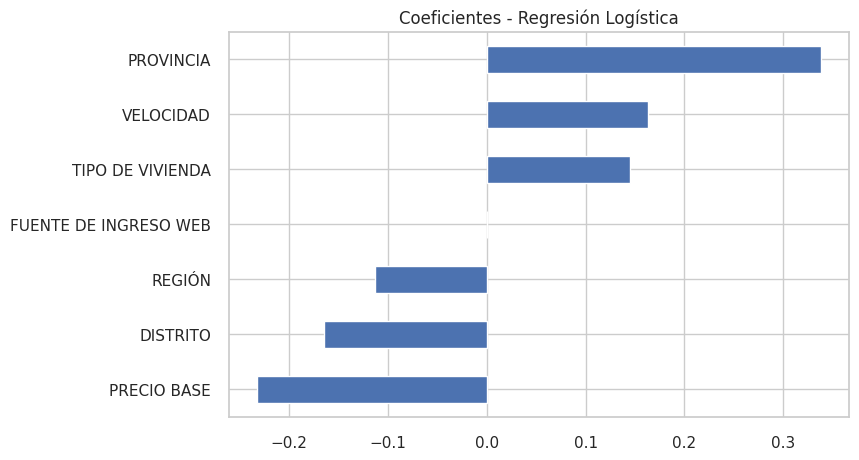

In [164]:
# Coeficientes del modelo logístico

coef = pd.Series(lr.coef_[0], index=X.columns)
coef.sort_values().plot(kind='barh', title='Coeficientes - Regresión Logística', figsize=(8,5))
plt.show()

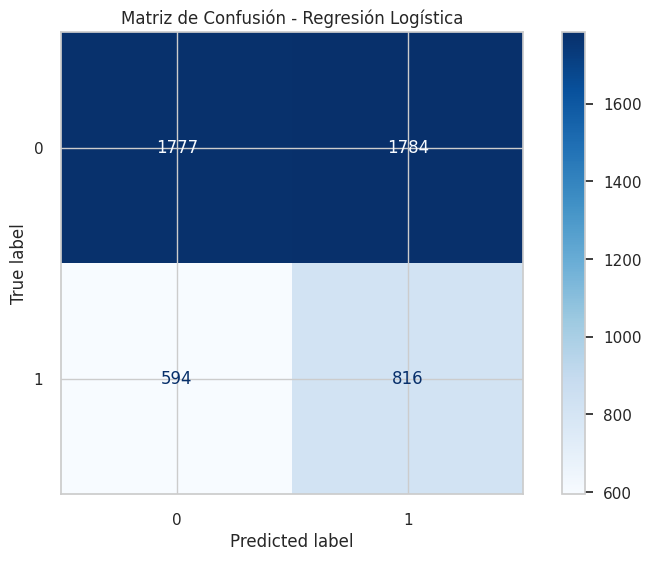

In [165]:
ConfusionMatrixDisplay.from_estimator(lr, X_test_scaled, y_test, cmap='Blues')
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

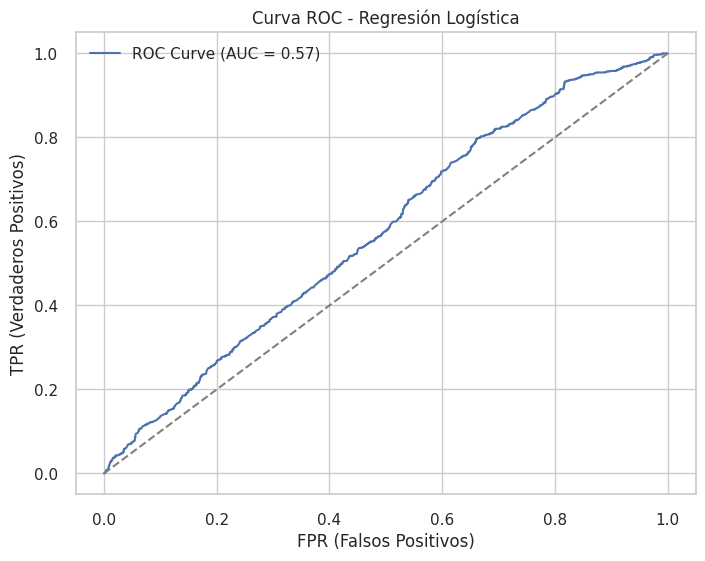

In [166]:
y_proba_log = lr.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba_log)
auc_score = roc_auc_score(y_test, y_proba_log)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Curva ROC - Regresión Logística')
plt.xlabel('FPR (Falsos Positivos)')
plt.ylabel('TPR (Verdaderos Positivos)')
plt.legend()
plt.grid(True)
plt.show()

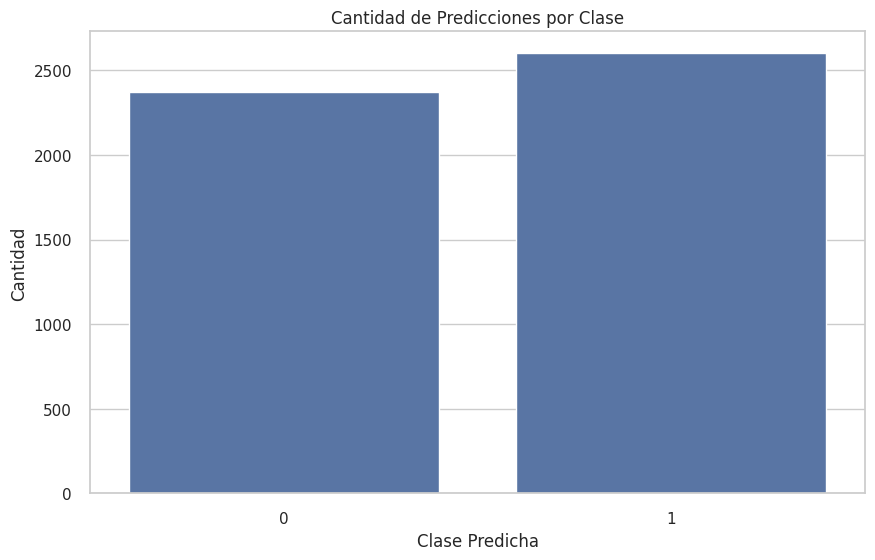

In [167]:
y_pred_log = lr.predict(X_test_scaled)
sns.countplot(x=y_pred_log)
plt.title('Cantidad de Predicciones por Clase')
plt.xlabel('Clase Predicha')
plt.ylabel('Cantidad')
plt.show()

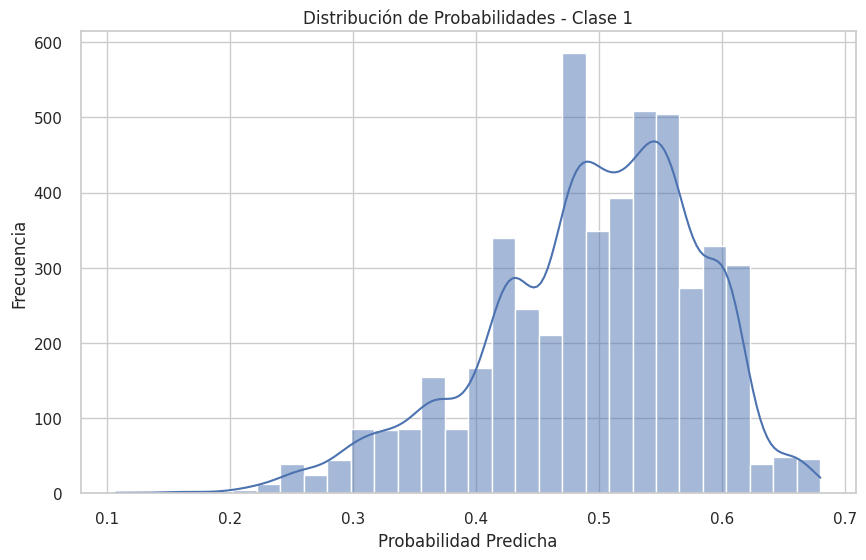

In [168]:
y_proba_log = lr.predict_proba(X_test_scaled)[:, 1]
sns.histplot(y_proba_log, bins=30, kde=True)
plt.title('Distribución de Probabilidades - Clase 1')
plt.xlabel('Probabilidad Predicha')
plt.ylabel('Frecuencia')
plt.show()

In [169]:
df_preds_log = pd.DataFrame({
    'Real': y_test,
    'Predicción': y_pred_log
})

df_preds_log.head(10)

,Real,Predicción
5653,0,1
15620,1,0
6332,1,1
4230,0,0
1688,0,1
6076,0,1
15538,1,0
7047,0,0
4010,0,1
14500,1,0


# *Parte 7: Conclusiones*



1. **La cobertura técnica es la condición mínima para la conversión**

La variable Estado de Cobertura es la más importante, dado que un lead sin cobertura técnica no puede convertirse en cliente bajo ningún escenario, como ya se había mencionado desde el inicio, cualquier estrategia de predicción debería aplicar este filtro como paso inicial obligatorio. Este hallazgo permite separar desde el inicio los leads no elegibles y enfocar los esfuerzos en quienes sí tienen posibilidad real de conversión. Sin embargo, esto no se consideró y se trabajó en la base total, pues la tasa de conversión de los leads dentro de cobertura está muy cerca del 100%.

2. **Comparativa de modelos de clasificación**

Se entrenaron y evaluaron dos modelos: Regresión Logística y Random Forest. Ambos modelos mostraron resultados aceptables, pero el Random Forest superó a la regresión logística en precisión general, sensibilidad y capacidad para manejar relaciones no lineales. No obstante, la regresión logística resultó útil para interpretar los coeficientes y entender cómo cada variable afecta la probabilidad de cierre.

3. **Problemas por desbalance de clases y su tratamiento**

Dado que el porcentaje de leads con conversión exitosa es bajo en el dataset total, el dataset presenta un fuerte desbalance. Esto afecta a modelos lineales como la regresión logística, que tienden a predecir la clase mayoritaria. Se usó class_weight='balanced' como estrategia de corrección, mejorando ligeramente la detección de positivos. Este desbalance también valida la importancia de filtrar previamente por cobertura.

4. **Importancia de la ingeniería de variables**

Variables como Precio, Velocidad y Plan están relacionadas entre sí y deben tratarse cuidadosamente para evitar redundancia. El análisis confirmó que el Precio Base se asigna automáticamente con el Plan, por lo tanto se considera una variable derivada. La correcta codificación y selección de variables fue fundamental para el desempeño de los modelos.

5. **Aplicaciones prácticas en el negocio de Nubyx**

Este análisis puede integrarse en los flujos comerciales de Nubyx para:

*  Automatizar el filtrado de leads no elegibles por cobertura
*  Calificar leads en tiempo real según probabilidad de conversión
*  Enfocar campañas en zonas o canales con mayor tasa de éxito
*  Optimizar el trabajo de los vendedores y reducir costos

# *Parte 8: Recomendaciones*

1. Considerar modelos más sofisticados para abordar el desbalance de clases con mayor precisión.


2. Integrar el sistema en herramientas CRM o dashboards para toma de decisiones automatizada.

3. Reforzar la recolección de datos operativos y comerciales para mejorar los modelos (por ejemplo: tiempo de contacto, canal de respuesta, etc.).

4. Implementar como primera regla de negocio el descarte automático de leads sin cobertura antes de aplicar modelos predictivos.

5. Entrenar modelos exclusivamente con leads "En Cobertura" para mejorar la precisión de la clasificación.

#*Adicional: Prueba de Modelado ambos tipos en la base exclusiva de solo cobertura*

In [170]:
# Crear variable binaria: 1 si es Contrato Cerrado, 0 en otro caso
df_cobertura['OBJETIVO_CONTRATO'] = df_cobertura['ESTADO DE ATENCIÓN'].apply(lambda x: 1 if x == 'Contrato Cerrado' else 0)

In [171]:
df_model = df_cobertura.copy()

# Convert 'PRECIO BASE' to numerical before defining X and y
df_model['PRECIO BASE'] = df_model['PRECIO BASE'].astype(str).str.replace('S/ ', '', regex=False).astype(float)

cols_cat = ['REGIÓN', 'PROVINCIA', 'DISTRITO', 'TIPO DE VIVIENDA', 'VELOCIDAD', 'FUENTE DE INGRESO WEB']

for col in cols_cat:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])

# Variables predictoras and objetivo
X = df_model[cols_cat + ['PRECIO BASE']]
y = df_model['OBJETIVO_CONTRATO']

In [172]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Random Forest:
              precision    recall  f1-score   support

           0       0.22      0.04      0.07        47
           1       0.97      1.00      0.98      1425

    accuracy                           0.96      1472
   macro avg       0.60      0.52      0.53      1472
weighted avg       0.95      0.96      0.95      1472



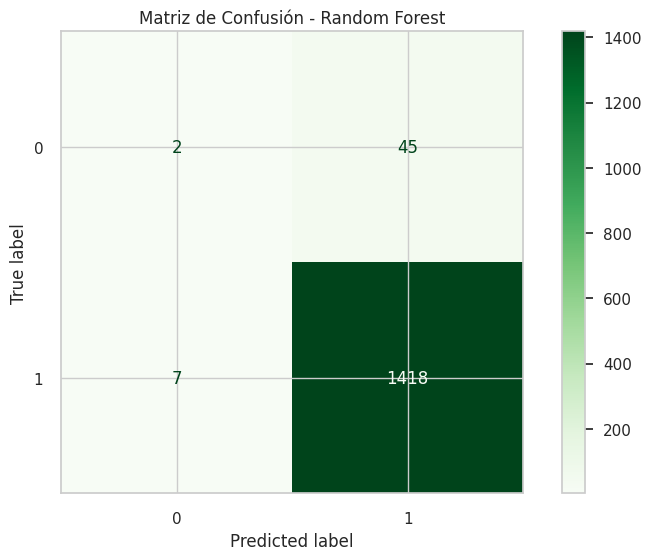

In [173]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest:")
print(classification_report(y_test, y_pred_rf))

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap='Greens')
plt.title('Matriz de Confusión - Random Forest')
plt.show()

Regresión Logística:
              precision    recall  f1-score   support

           0       0.04      0.57      0.07        47
           1       0.97      0.54      0.69      1425

    accuracy                           0.54      1472
   macro avg       0.51      0.56      0.38      1472
weighted avg       0.94      0.54      0.67      1472



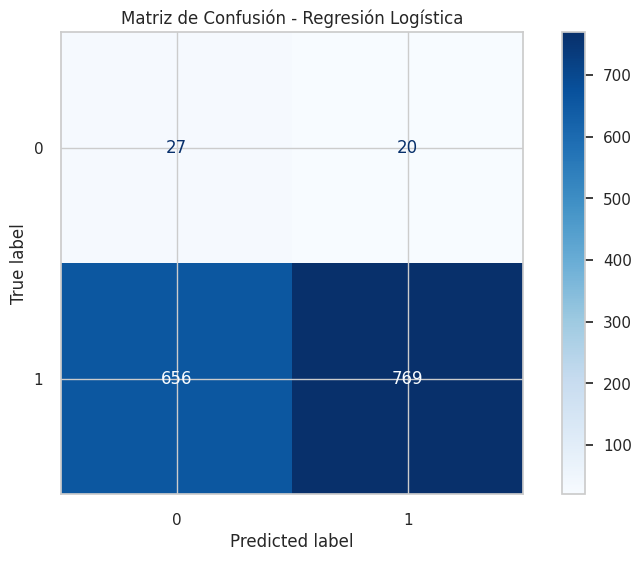

In [174]:
lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("Regresión Logística:")
print(classification_report(y_test, y_pred_lr))

ConfusionMatrixDisplay.from_estimator(lr, X_test_scaled, y_test, cmap='Blues')
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()